Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [4]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:/Users/root/Downloads/CNN_assignment/upgrad/Train/")
data_dir_test = pathlib.Path('C:/Users/root/Downloads/CNN_assignment/upgrad/Train/')

In [7]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
2239


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [61]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [28]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [29]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [30]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

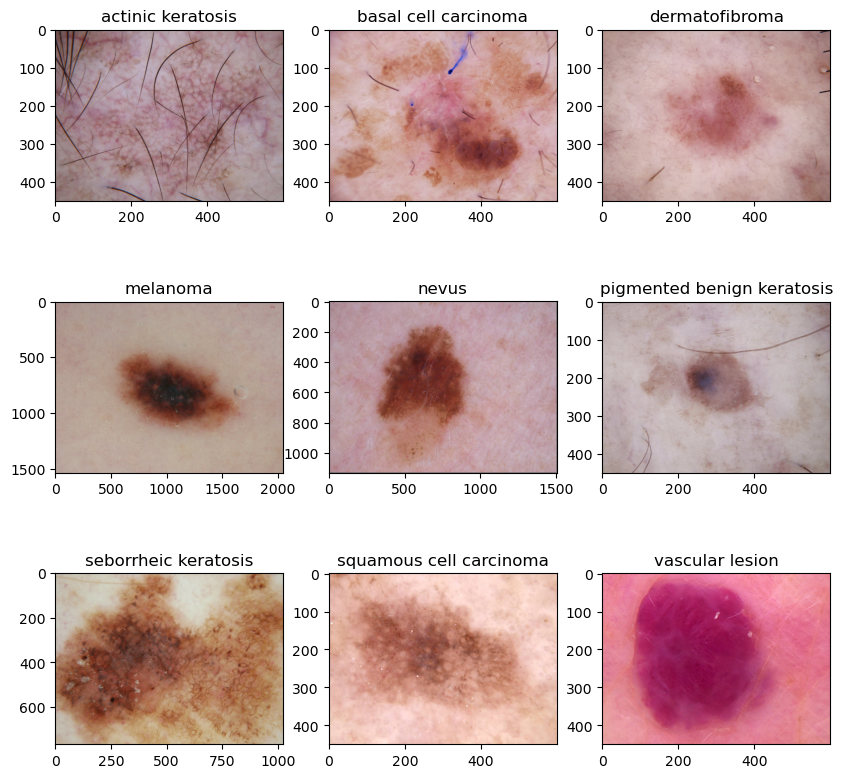

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [10]:
### Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [11]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                   

### Train the model

In [13]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\root\anaconda3\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 [==============================] - 138s 2s/step - loss: 2.0647 - accuracy: 0.2020 - val_loss: 2.0218 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 131s 2s/step - loss: 2.0235 - accuracy: 0.2037 - val_loss: 2.0371 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 137s 2s/step - loss: 2.0222 - accuracy: 0.2143 - val_loss: 2.0170 - val_accuracy: 0.2260
Epoch 4/20
56/56 [==============================] - 130s 2s/step - loss: 2.0030 - accuracy: 0.2288 - val_loss: 1.9025 - val_accuracy: 0.3020
Epoch 5/20
56/56 [==============================] - 126s 2s/step - loss: 1.9042 - accuracy: 0.2958 - val_loss: 1.8352 - val_accuracy: 0.3221
Epoch 6/20
56/56 [==============================] - 127s 2s/step - loss: 1.8476 - accuracy: 0.3119 - val_loss: 1.7808 - val_accuracy: 0.3087
Epoch 7/20
56/56 [==============================] - 127s 2s/step - loss: 1.7597 - accuracy: 0.3504 - val_loss: 1.7259 - val_accuracy: 0.3602
Epoch 8/20
56/56 [======

### Visualizing training results

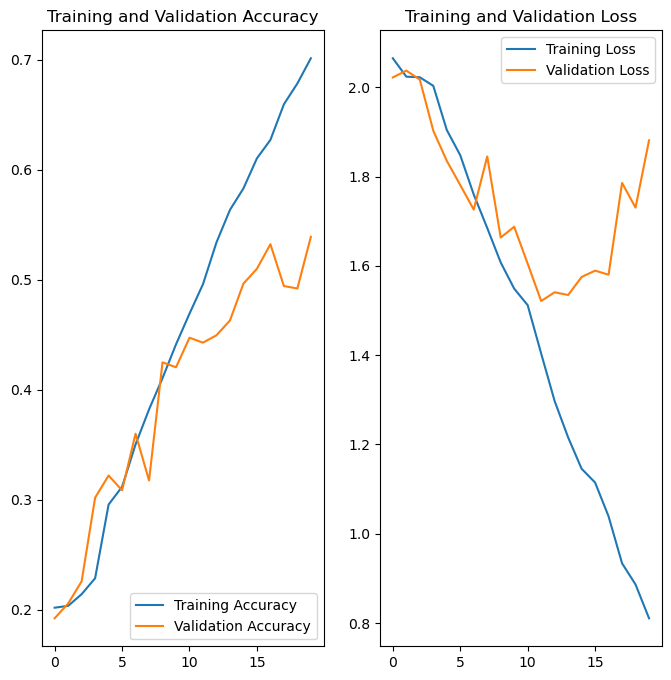

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings
Its Overfit model
accuracy around 70%


### Write your findings here

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

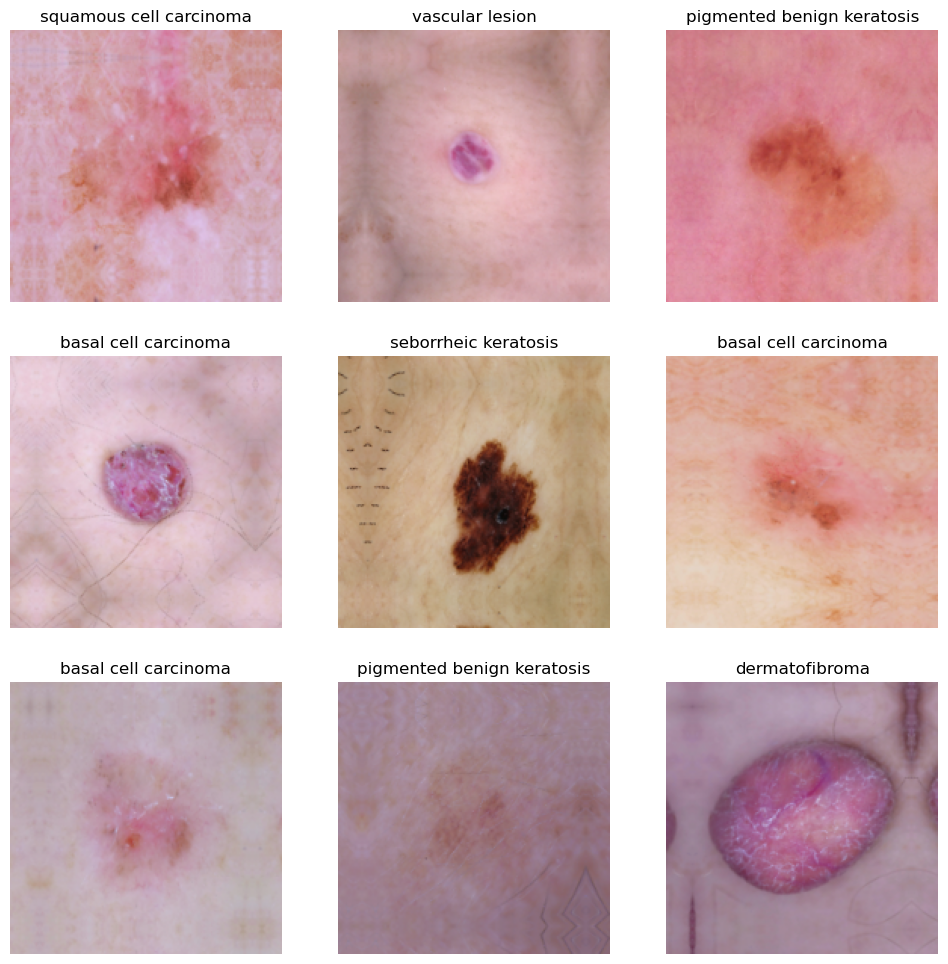

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augument(images)[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))


### Compiling the model

In [19]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 143s 3s/step - loss: 2.0567 - accuracy: 0.2076 - val_loss: 1.9484 - val_accuracy: 0.2103
Epoch 2/20
56/56 [==============================] - 145s 3s/step - loss: 1.8889 - accuracy: 0.2963 - val_loss: 1.8228 - val_accuracy: 0.2841
Epoch 3/20
56/56 [==============================] - 161s 3s/step - loss: 1.8060 - accuracy: 0.3326 - val_loss: 1.7712 - val_accuracy: 0.3244
Epoch 4/20
56/56 [==============================] - 166s 3s/step - loss: 1.7003 - accuracy: 0.3811 - val_loss: 1.6851 - val_accuracy: 0.3691
Epoch 5/20
56/56 [==============================] - 165s 3s/step - loss: 1.6255 - accuracy: 0.3962 - val_loss: 1.5766 - val_accuracy: 0.4564
Epoch 6/20
56/56 [==============================] - 163s 3s/step - loss: 1.6147 - accuracy: 0.4297 - val_loss: 1.5806 - val_accuracy: 0.4340
Epoch 7/20
56/56 [==============================] - 155s 3s/step - loss: 1.5919 - accuracy: 0.4308 - val_loss: 1.6620 - val_accuracy: 0.4161
Epoch 8/20
56

### Visualizing the results

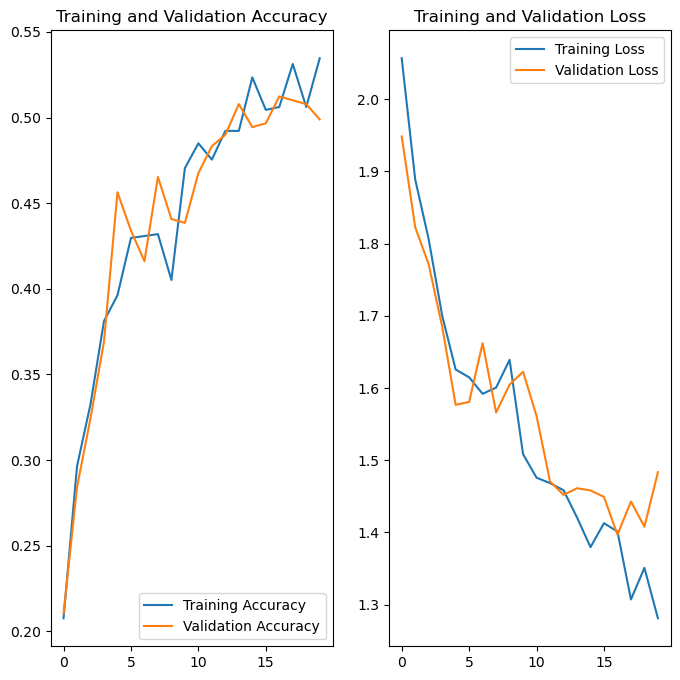

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Findings
accuracy suffered, overfitting reduced.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [26]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

NameError: name 'class_names' is not defined

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
Answer : seborrheic keratosis
#### - Which classes dominate the data in terms proportionate number of samples?
pigmented benign keratosis  and melanoma


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [25]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [33]:
path_to_training_dataset="C:/Users/root/Downloads/CNN_assignment/upgrad/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.65, max_left_rotation=20, max_right_rotation=15)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:/Users/root/Downloads/CNN_assignment/upgrad/Train/actinic keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x1129DB870D0>: 100%|██████████| 500/500 [00:01<00:00, 286.41 Samples/s]


Initialised with 376 image(s) found.
Output directory set to C:/Users/root/Downloads/CNN_assignment/upgrad/Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1129D814690>: 100%|██████████| 500/500 [00:01<00:00, 283.77 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to C:/Users/root/Downloads/CNN_assignment/upgrad/Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x112A03175D0>: 100%|██████████| 500/500 [00:01<00:00, 256.40 Samples/s]                  


Initialised with 438 image(s) found.
Output directory set to C:/Users/root/Downloads/CNN_assignment/upgrad/Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1129D744A90>: 100%|██████████| 500/500 [00:07<00:00, 65.15 Samples/s]                    


Initialised with 357 image(s) found.
Output directory set to C:/Users/root/Downloads/CNN_assignment/upgrad/Train/nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x112A9169890>: 100%|██████████| 500/500 [00:07<00:00, 62.85 Samples/s] 


Initialised with 462 image(s) found.
Output directory set to C:/Users/root/Downloads/CNN_assignment/upgrad/Train/pigmented benign keratosis\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x112A09AC550>: 100%|██████████| 500/500 [00:01<00:00, 258.16 Samples/s]


Initialised with 77 image(s) found.
Output directory set to C:/Users/root/Downloads/CNN_assignment/upgrad/Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1129DB43D90>: 100%|██████████| 500/500 [00:04<00:00, 117.93 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to C:/Users/root/Downloads/CNN_assignment/upgrad/Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1129D745DD0>: 100%|██████████| 500/500 [00:01<00:00, 268.21 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to C:/Users/root/Downloads/CNN_assignment/upgrad/Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1129D81E210>: 100%|██████████| 500/500 [00:01<00:00, 261.50 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [44]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


In [1]:
pip install glob

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement glob (from versions: none)
ERROR: No matching distribution found for glob


### Lets see the distribution of augmented data after adding new images to the original training data.

In [45]:
import glob
import os
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\Users\\root\\Downloads\\CNN_assignment\\upgrad\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_327c5c34-917b-48e5-adae-509737cf72f3.jpg',
 'C:\\Users\\root\\Downloads\\CNN_assignment\\upgrad\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_3624f09b-22b5-4269-b193-887a53b06810.jpg',
 'C:\\Users\\root\\Downloads\\CNN_assignment\\upgrad\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_4c565a2d-59de-4325-a164-76cc08d84ca4.jpg',
 'C:\\Users\\root\\Downloads\\CNN_assignment\\upgrad\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_c6772d70-4fc4-4c86-bff7-81f28601a119.jpg',
 'C:\\Users\\root\\Downloads\\CNN_assignment\\upgrad\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_fde6d926-199f-4971-9760-a4f360787228.jpg',
 'C:\\Users\\root\\Downloads\\CNN_assignment\\upgrad\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_00258

In [46]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new
path_list_new=[]
lesion_list_new=[]

In [55]:
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_new = dict(zip(path_list, lesion_list))
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
df2

,Path,Label
0,C:\Users\root\Downloads\CNN_assignment\upgrad\...,actinic keratosis
1,C:\Users\root\Downloads\CNN_assignment\upgrad\...,actinic keratosis
2,C:\Users\root\Downloads\CNN_assignment\upgrad\...,actinic keratosis
3,C:\Users\root\Downloads\CNN_assignment\upgrad\...,actinic keratosis
4,C:\Users\root\Downloads\CNN_assignment\upgrad\...,actinic keratosis
...,...,...
6734,C:\Users\root\Downloads\CNN_assignment\upgrad\...,actinic keratosis
6735,C:\Users\root\Downloads\CNN_assignment\upgrad\...,actinic keratosis
6736,C:\Users\root\Downloads\CNN_assignment\upgrad\...,actinic keratosis
6737,C:\Users\root\Downloads\CNN_assignment\upgrad\...,actinic keratosis


In [56]:
new_df['Label'].value_counts()

pigmented benign keratosis    1386
melanoma                      1314
basal cell carcinoma          1128
nevus                         1071
squamous cell carcinoma        543
vascular lesion                417
actinic keratosis              364
dermatofibroma                 285
seborrheic keratosis           231
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [57]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [65]:
data_dir_train=("C:/Users/root/Downloads/CNN_assignment/upgrad/Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [66]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [67]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [68]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [71]:
epochs =1
#doing on one epoch as time limit
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

  7/169 [>.............................] - ETA: 6:39 - loss: 2.0944 - accuracy: 0.1875

KeyboardInterrupt: 

#### **Todo:**  Visualize the model results

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [74]:
### accuracy increased by using augmented library
import os
cwd = os.getcwd()
print(cwd)

C:\Users\root
